## Connectionist Neuron

In [1]:
import pandas
import matplotlib.pyplot as plt
from math import *

import numpy as np

In [2]:
# Load data from csv file
file = "applesOranges.csv"

df = pandas.read_csv(file)

#df.head()
df.describe()

,x.1,x.2,y
count,200.000000,200.000000,200.000000
mean,0.252160,0.241115,0.500000
std,0.560932,0.577747,0.501255
min,-1.335000,-1.032000,0.000000
25%,-0.137000,-0.193000,0.000000
50%,0.219500,0.256000,0.500000
75%,0.621000,0.661750,1.000000
max,2.059000,1.610000,1.000000


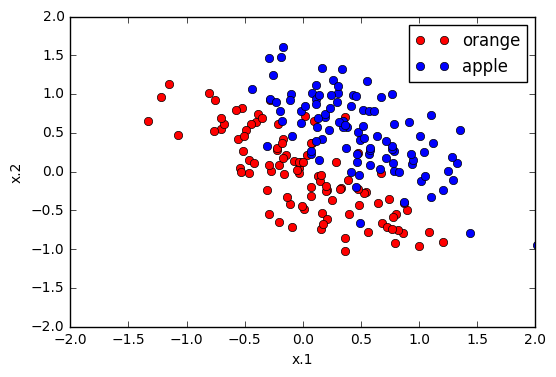

In [3]:
# a) Plot the data in a scatter plot (x.1 vs. x.2). Use color to indicate the type of each object.

ORANGE_LABEL = 0
APPLE_LABEL = 1
orangeDf = df.loc[df['y'] == ORANGE_LABEL ]
appleDf = df.loc[df['y'] == APPLE_LABEL ]


axes = plt.gca()
axes.set_xlim([-2,2])
axes.set_ylim([-2,2])
plt.xlabel('x.1')
plt.ylabel('x.2')


plt.plot( orangeDf['x.1'], orangeDf['x.2'], 'ro', label="orange" )
plt.plot( appleDf['x.1'], appleDf['x.2'], 'bo', label="apple")
plt.legend()

In [4]:
# b)
theta = 0
alpha_step = 10
no_w = 19

def generate_W(i):
    rad = radians(i*alpha_step)
    x_1 = cos(rad)
    x_2 = sin(rad)
    return np.array([x_1, x_2])
W = list(map( generate_W, list(range(no_w)) ))

Accuracy for W[0] [ 1.0000 0.0000 ] : 0.6750
Accuracy for W[1] [ 0.9848 0.1736 ] : 0.7050
Accuracy for W[2] [ 0.9397 0.3420 ] : 0.7600
Accuracy for W[3] [ 0.8660 0.5000 ] : 0.7450
Accuracy for W[4] [ 0.7660 0.6428 ] : 0.7100
Accuracy for W[5] [ 0.6428 0.7660 ] : 0.7350
Accuracy for W[6] [ 0.5000 0.8660 ] : 0.7550
Accuracy for W[7] [ 0.3420 0.9397 ] : 0.7500
Accuracy for W[8] [ 0.1736 0.9848 ] : 0.7250
Accuracy for W[9] [ 0.0000 1.0000 ] : 0.6900
Accuracy for W[10] [ -0.1736 0.9848 ] : 0.6300
Accuracy for W[11] [ -0.3420 0.9397 ] : 0.6000
Accuracy for W[12] [ -0.5000 0.8660 ] : 0.5650
Accuracy for W[13] [ -0.6428 0.7660 ] : 0.5200
Accuracy for W[14] [ -0.7660 0.6428 ] : 0.5050
Accuracy for W[15] [ -0.8660 0.5000 ] : 0.4650
Accuracy for W[16] [ -0.9397 0.3420 ] : 0.4200
Accuracy for W[17] [ -0.9848 0.1736 ] : 0.3500
Accuracy for W[18] [ -1.0000 0.0000 ] : 0.3250
------
Best accuracy (0.7600) is from W[2] [ 0.9397 0.3420]


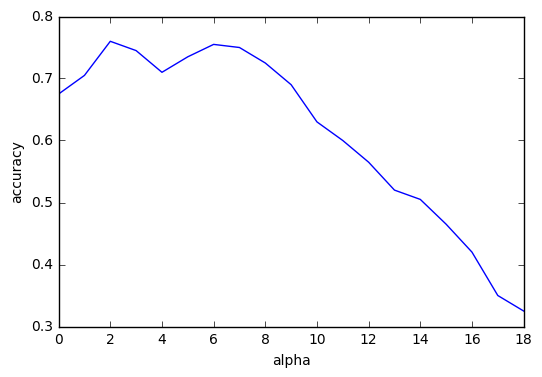

In [5]:

def sign(x):
    if x >= 0:
        return 1
    return 0

def predict( df, w, theta ):
    hs = df.as_matrix(['x.1','x.2']) * np.matrix(w).T - theta
    return np.apply_along_axis( sign, 0, hs.flatten() )

best_score = 0;
best_w = []
accs = []
for i in range(len(W)):
    pred = predict( df[['x.1','x.2']], W[i], 0 )
    acc = len(df.loc[df['y'] == pred])  / len(df)*1.0
    if acc > best_score :
        best_score = acc
        best_w = i
    accs.append(acc)
    print("Accuracy for W[%d] [ %.4f %.4f ] : %.4f" % (i, W[i][0], W[i][1] ,acc) )
    
print("------")
print("Best accuracy (%.4f) is from W[%d] [ %.4f %.4f]" % ( best_score, best_w, W[best_w][0], W[best_w][1]))

plt.xlabel('alpha')
plt.ylabel('accuracy')

plt.plot( accs )


In [6]:
# c)

thetas = np.linspace(-3,3,num=10)

best_score = 0
best_theta  = 0
print("Evaluating W[%d] [ %.4f %.4f ] with various thetha" %(best_w, W[best_w][0], W[best_w][1]) )
for i in range(len(thetas)):
    pred = predict( df[['x.1','x.2']], W[best_w], thetas[i] )
    acc = len(df.loc[df['y'] == pred])  / len(df)*1.0
    if acc > best_score :
        best_score = acc
        best_theta = i
    accs.append(acc)
    print("Accuracy for theta %1.4f : %.4f" % ( thetas[i] ,acc) )


print("--------")
print("Best accuracy W[ %.4f %.4f] theta %1.4f : %.4f" % ( W[best_w][0], W[best_w][1], thetas[best_theta], best_score))


Evaluating W[2] [ 0.9397 0.3420 ] with various thetha
Accuracy for theta -3.0000 : 0.5000
Accuracy for theta -2.3333 : 0.5000
Accuracy for theta -1.6667 : 0.5000
Accuracy for theta -1.0000 : 0.5050
Accuracy for theta -0.3333 : 0.6000
Accuracy for theta 0.3333 : 0.7850
Accuracy for theta 1.0000 : 0.5750
Accuracy for theta 1.6667 : 0.5050
Accuracy for theta 2.3333 : 0.5000
Accuracy for theta 3.0000 : 0.5000
--------
Best accuracy W[ 0.9397 0.3420] theta 0.3333 : 0.7850


[6.4107806453941185, 5.189679570080953, 3.9685784947677876, 2.7474774194546221, 1.5263763441414564, 0.30527526882829031, -0.91582580648487455, -2.1369268817980394, -3.3580279571112057, -4.5791290324243716]


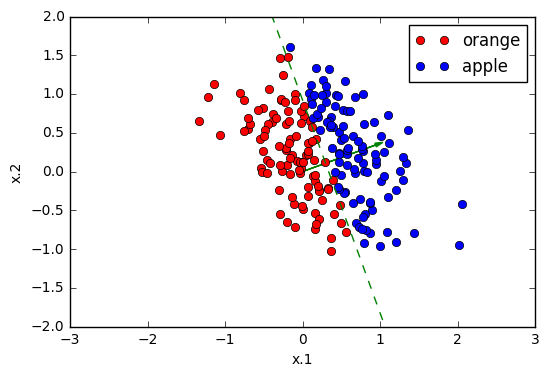

In [7]:
# d )

axes = plt.gca()
plt.axis('equal')
axes.set_xlim([-2,2])
axes.set_ylim([-2,2])
plt.xlabel('x.1')
plt.ylabel('x.2')

pred  = predict( df[['x.1','x.2']], W[best_w], thetas[best_theta] )

pred_orange = df[ pred == ORANGE_LABEL ]
pred_apple = df[ pred == APPLE_LABEL ]
plt.plot( pred_orange['x.1'], pred_orange['x.2'], 'ro', label="orange" )
plt.plot( pred_apple['x.1'], pred_apple['x.2'], 'bo', label="apple")
plt.legend()


ax = plt.axes()
ax.arrow(0, 0, W[best_w][0], W[best_w][1], head_width=0.05, head_length=0.1, fc='g', ec='g')

xs = np.linspace(-2,2,num=10)
ys = [ ((-W[best_w][0]*(i-thetas[best_theta])/W[best_w][1])) for i in xs ]

print(ys)


plt.plot(xs,ys,'g--')

Best Accuracy comes from W [ 0.6428 0.7660 ] theta 0.3333 : 0.9050


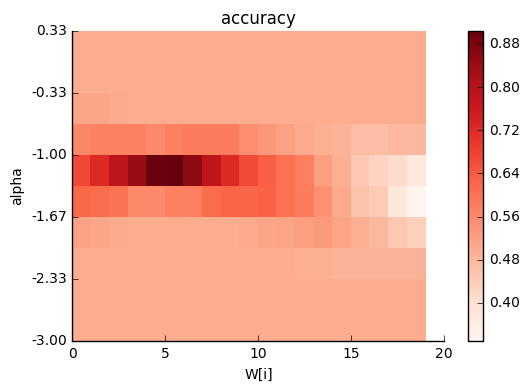

In [12]:
# e)
fig, ax = plt.subplots()

heat_accs = []
best_score = 0
best_w = 0
best_theta =0
for t in thetas:
    for w in W:
        pred = predict( df[['x.1','x.2']], w, t )
        acc = len(df.loc[df['y'] == pred])  / len(df)*1.0
        if acc > best_score :
            best_score = acc
            best_w = w
            best_theta = t
            
        heat_accs.append(acc)

print("Best Accuracy comes from W [ %.4f %.4f ] theta %.4f : %.4f" % (best_w[0],best_w[1], best_theta, best_score ))
heat_accs = np.array(heat_accs)

# heat_accs = ( heat_accs - heat_accs.min(0) ) / heat_accs.ptp(0)
heat_accs = heat_accs.reshape(len(thetas),len(W))


heatmap = ax.pcolor(heat_accs, cmap=plt.cm.Reds)

plt.colorbar(heatmap)
ax.set_title('accuracy')



ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


plt.xlabel('W[i]')
plt.ylabel('alpha')

ax.set_yticklabels( ["%.2f" %(t) for t in thetas], minor=False)

plt.show()


## e)
---
